In [ ]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 249 images belonging to 5 classes.
Found 249 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/250
2/2 [==============================] - 81s 63s/step - loss: 1.6564 - accuracy: 0.1562 - val_loss: 1.6096 - val_accuracy: 0.1688
Epoch 2/250
2/2 [==============================] - 11s 9s/step - loss: 1.5850 - accuracy: 0.2656 - val_loss: 1.6091 - val_accuracy: 0.2313
Epoch 3/250
2/2 [==============================] - 1s 1s/step - loss: 1.4740 - accuracy: 0.4688 - val_loss: 1.6093 - val_accuracy: 0.2125
Epoch 4/250
2/2 [==============================] - 2s 962ms/step - loss: 1.4011 - accuracy: 0.5000 - val_loss: 1.6090 - val_accuracy: 0.1937
Epoch 5/250
2/2 [==============================] - 1s 487ms/step - loss: 1.3039 - accuracy: 0.5439 - val_loss: 1.6088 - val_accuracy: 0.1688
Epoch 6/250
2/2 [==============================] - 1s 448ms/step - loss: 1.2476 - accuracy: 0.6316 - val_loss: 1.6091 - val_accuracy: 0.1625
Epoch 7/250
2/2 [==============================] - 1s 524ms/step - loss: 1.2688 - accuracy: 0.5312 - val_loss: 1.6078 - val_accuracy: 0.2125
Epoch 8/250
2/2 [==

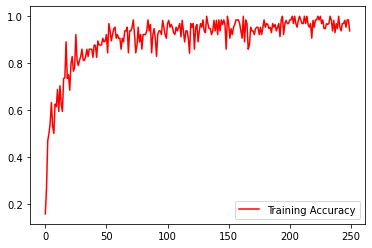

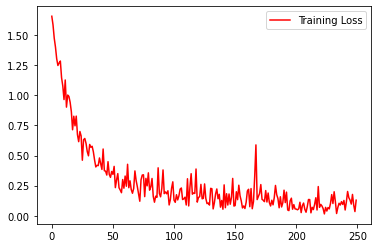

In [ ]:

## real time data augmentation ..

trainDataGen = ImageDataGenerator(
		rotation_range = 5,          ## rotated image training
		width_shift_range = 0.2,
		height_shift_range=0.2,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		   ## zoomed image training
		brightness_range=[0.4,1.5],
		horizontal_flip = True,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)     ### this is basically normalisation (ratio by which each pixel is multiplied)
trainGenerator = trainDataGen.flow_from_directory(
			"/content/drive/MyDrive/data",    ## directory of foler having classes of training sets
			target_size = (32,32),
			batch_size = 32,
			color_mode="grayscale",
			class_mode = "categorical")
prev = ""
labels = ['1', '2', '3', '4', '5']
count = 0;

validation_generator = test_datagen.flow_from_directory(
			"/content/drive/MyDrive/data",     ## directory of folder having tests set
			target_size=(32,32),
			batch_size=32,
			color_mode="grayscale",
			class_mode= 'categorical')
			
model = Sequential()

model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
	
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			

# model.add(Convolution2D(filters = 64,
# 			kernel_size = (2,2),
# 			strides= 1,
# 			activation = "relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),
# 			strides=(2, 2),
# 			padding="same"))

model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(5,    # orignally was 46 (letters + digits) but we need 36 outputs
		activation = "softmax",
		kernel_initializer = "uniform"))			
			
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model.summary())

res=model.fit_generator(
		trainGenerator,
		epochs = 250,
		steps_per_epoch = 2,       # 2444
		validation_data = validation_generator,
		validation_steps = 5
		)

%matplotlib inline
accu=res.history['accuracy']
#val_acc=res.history['val_accuracy']
loss=res.history['loss']
#val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

# graph plotting
import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
# plt.plot(epochs,val_acc,'g',label='Testing Accuracy')  
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
# plt.plot(epochs,val_loss,'g',label='Testing Loss')   
plt.legend()
plt.show()
		
## saving the model --  we can do one thing is define two functions in a class..
# one function will have model preparation..
# the other will give results..

model.save("HardWiredVision.h5")

In [ ]:

from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2

labels = ['1', '2', '3', '4', '5']
import numpy as np
from keras.preprocessing import image
# loading the 'captcha.jpg' image..
test_image = cv2.imread("4_13.jpg")   # to enter the name of image...
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#ret, image1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)
print("[INFO] loading network...")
import tensorflow as tf
model = tf.keras.models.load_model("HardWiredVision.h5")  # directory of our model in my PC.
lists = model.predict(image)[0]  ## only one letter per image...
print(labels[np.argmax(lists)])
	
#© 2021 GitHub, Inc.

[INFO] loading network...
4
